1. Import required packages.
2. Load the data file
3. Select only the following columns from the dataset: 'PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'.

3 pts.

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import math

In [2]:
from google.colab import files
uploaded = files.upload()

import io
listings = pd.read_csv(io.BytesIO(uploaded['redfin_2024-03-10-08-28-27.csv']))

Saving redfin_2024-03-10-08-28-27.csv to redfin_2024-03-10-08-28-27.csv


In [3]:
listings = listings[['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']]

4. Check for missing values using a heatmap.
5. Check data distribution by property type using a histogram (bar graph).
6. Exclude records if appropriate.

3 pts.



<Axes: >

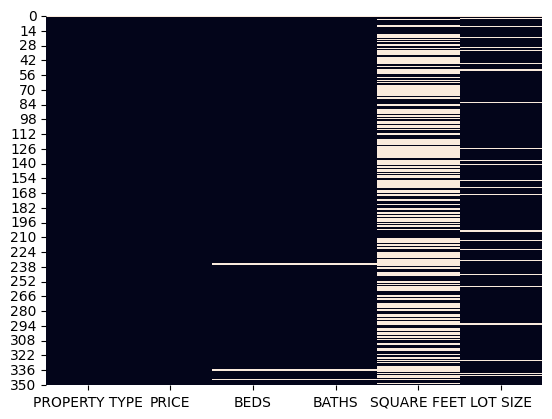

In [4]:
sns.heatmap(listings.isnull(), cbar=False)


<Axes: >

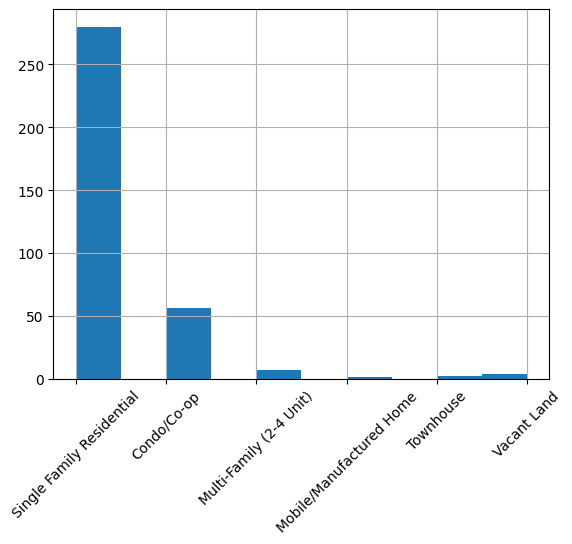

In [5]:
listings['PROPERTY TYPE'].hist(xrot=45.0)

In [6]:
listings['PROPERTY TYPE'].unique()

array([nan, 'Single Family Residential', 'Condo/Co-op',
       'Multi-Family (2-4 Unit)', 'Mobile/Manufactured Home', 'Townhouse',
       'Vacant Land'], dtype=object)

In [7]:
property_types_to_remove = ['Vacant Land', 'Multi-Family (2-4 Unit)', 'Townhouse', 'Mobile/Manufactured Home']

listings.drop(listings[listings['PROPERTY TYPE'].isin(property_types_to_remove)].index, inplace=True)

7. Build a pairplot to evaluate data distributions and correlations.
8. Comment whether the predictors: 1) have a linear relationship with the target (Price), 2) display constant variance (homoscedasticity), 3) contain outliers that need to be excluded.

5 pts.

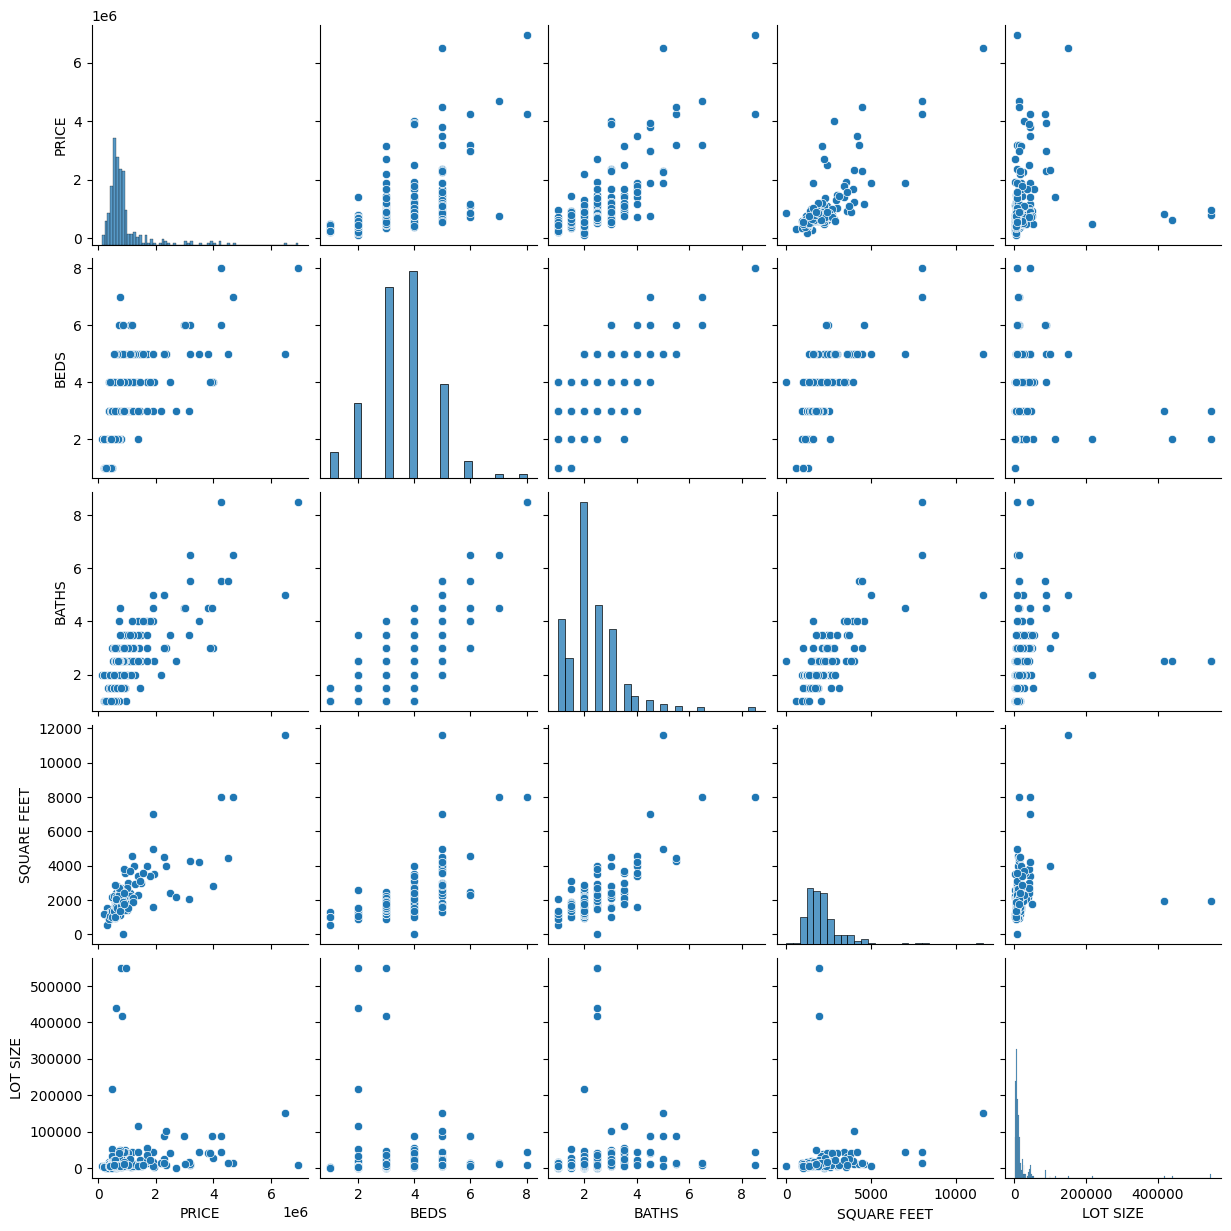

In [8]:
sns.pairplot(listings)

# Price and Size: There's a trend showing that as the size of the property increases, so does the price.
# Spread of Price: The spread of the prices seems to get wider with larger properties, which could mean the price predictions might be less precise for bigger properties.
# Outliers: Some properties stand out because they have very high prices or are very large compared to others.
# Types of Properties: There are more single-family homes than other types, and their prices vary a lot.

9. Remove outliers if necessary.
10. Impute missing values as appropriate.

2 pts.


In [9]:
listings.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.360000e+02,336.000000,336.000000,144.000000,312.000000
mean,9.399229e+05,3.568452,2.319940,2257.625000,20598.567308
std,8.504996e+05,1.182491,1.069742,1430.184109,57771.759586
min,1.290000e+05,1.000000,1.000000,1.000000,436.000000
25%,5.537500e+05,3.000000,2.000000,1442.500000,5983.750000
50%,6.999000e+05,4.000000,2.000000,1928.500000,8276.000000
75%,8.999990e+05,4.000000,3.000000,2504.250000,14483.750000
max,6.949999e+06,8.000000,8.500000,11625.000000,548898.000000


In [10]:
listings.drop(listings[listings['SQUARE FEET'] > 5000 ].index, inplace=True)
listings.drop(listings[listings['LOT SIZE'] > 100000 ].index, inplace=True)

In [ ]:
imputed = listings.fillna(listings.mean())

In [14]:
imputed.describe()

,PRICE,BEDS,BATHS,SQUARE FEET,LOT SIZE
count,3.260000e+02,326.000000,326.000000,326.000000,326.000000
mean,8.953111e+05,3.553846,2.266154,2062.540146,12582.245847
std,7.490001e+05,1.137213,0.980938,575.276640,12946.465031
min,1.290000e+05,1.000000,1.000000,1.000000,436.000000
25%,5.499992e+05,3.000000,2.000000,2062.540146,6000.000000
50%,6.990000e+05,4.000000,2.000000,2062.540146,8972.000000
75%,8.990000e+05,4.000000,2.500000,2062.540146,12582.245847
max,6.949999e+06,8.000000,8.500000,5000.000000,87168.000000


In [15]:
imputed.columns

Index(['PROPERTY TYPE', 'PRICE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE'], dtype='object')

11. Split data 70/30 into training and test datasets.
12. Build a multiple linear regression model to predict Price.
13. Report R2, MAE, Max error, RMSE.
14. Comment on whether the model performance would be acceptable for practitioners.

7 pts.

In [16]:
predictors = ['PROPERTY TYPE', 'BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE']

In [17]:
X = pd.get_dummies(imputed[predictors], drop_first=True)
y = imputed['PRICE']

train_X, valid_X, train_y, valid_y = train_test_split(X, y, test_size=0.3, random_state=1)

In [18]:
re_prices = LinearRegression()

re_prices.fit(train_X, train_y)

LinearRegression()

In [19]:
X.columns

Index(['BEDS', 'BATHS', 'SQUARE FEET', 'LOT SIZE',
       'PROPERTY TYPE_Single Family Residential'],
      dtype='object')

In [20]:
re_prices.intercept_

-752763.0834236043

In [21]:
re_prices.coef_

array([8.56481885e+03, 5.19173523e+05, 1.64255414e+02, 7.51301140e+00,
       1.68957469e+04])

In [22]:
train_X.head()

,BEDS,BATHS,SQUARE FEET,LOT SIZE,PROPERTY TYPE_Single Family Residential
44,4.0,2.0,2062.540146,15682.000000,1
141,1.0,1.0,2062.540146,12582.245847,0
175,3.0,1.0,2062.540146,10890.000000,1
173,4.0,2.0,1210.000000,10890.000000,1
337,8.0,8.5,2062.540146,8000.000000,1


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, max_error, r2_score, explained_variance_score

In [24]:
pred_y = re_prices.predict(valid_X)

In [25]:
print('Regression model performance evaluation')
print('R2: ', r2_score(valid_y, pred_y))
print('MAE: ', mean_absolute_error(valid_y, pred_y))
print('RMSE: ', math.sqrt(mean_squared_error(valid_y, pred_y)))
print('Max error: ', max_error(valid_y, pred_y))

Regression model performance evaluation
R2:  0.31545225393096243
MAE:  352614.5600522441
RMSE:  502087.8331861964
Max error:  2400944.5020130454


R2: The model is getting about 31.5% of the predictions right when it comes to the variation in prices. That's not a great score – it's like it only understands a third of what's going on with the prices.

MAE (Mean Absolute Error): On average, The model is about $352,614 off when it predicts a property's price. Now, if we're talking about mansions, maybe that's not too bad. But for most homes, being off by that much could be a deal-breaker.

RMSE (Root Mean Squared Error): This is another way to measure mistakes, and it usually makes the errors look even bigger. Here it's saying that, on average, the model's predictions can be off by about $502,087. Again, if we're in high-stakes properties, it might be okay, but it's quite a bit of money for the average property.

Max Error: The biggest mistake for this model made was being off by $2,400,944 on one of the property prices. That's a huge miss and could be a serious problem.


The model's R2 score is low, suggesting it misses a lot of what affects house prices. With an average error around  352K  and sometimes being off by as much as $2.4 million, it's not reliable for professionals who need precise pricing, like agents or investors. It needs tweaking before it can be useful in the real world.